<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 191.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 217.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 156.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 67.2 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [3]:
df = pd.read_csv("datos.csv.crdownload")
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ConvertedCompYearly_min_max,ConvertedCompYearly_Log,ExperienceLevel
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053,11.363907,Junior
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.000000,0.000000,0.000000,Appropriate in length,Easy,86155.287263,6.935041,0.0053,11.363907,Expert
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,16.169432,10.955713,9.953948,Appropriate in length,Easy,86155.287263,6.935041,0.0053,11.363907,Expert
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,16.169432,10.955713,9.953948,Too long,Easy,86155.287263,6.935041,0.0053,11.363907,Junior
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,16.169432,10.955713,9.953948,Too short,Easy,86155.287263,6.935041,0.0053,11.363907,Junior


#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
df[["Employment","RemoteWork","JobSat"]].dtypes

Employment     object
RemoteWork     object
JobSat        float64
dtype: object

In [6]:
df[["Employment","RemoteWork","JobSat"]].isnull().sum()

Employment    0
RemoteWork    0
JobSat        1
dtype: int64

In [7]:
df["RemoteWork"]=df["RemoteWork"].fillna(df["RemoteWork"].mode()[0])
df["JobSat"]=df["JobSat"].fillna(df["JobSat"].mean())

In [8]:
df[["Employment","RemoteWork","JobSat"]].isnull().sum()

Employment    0
RemoteWork    0
JobSat        0
dtype: int64

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [9]:
df['YearsCodePro'].unique()

array([ 2.        , 17.        , 27.        ,  7.        , 11.        ,
       25.        , 12.        , 10.        ,  3.        ,  8.80711967,
       18.        , 37.        , 15.        , 20.        ,  6.        ,
       16.        ,  8.        , 14.        ,  4.        , 45.        ,
        1.        , 24.        , 29.        ,  5.        , 30.        ,
       26.        ,  9.        , 33.        , 13.        , 35.        ,
       23.        , 22.        , 31.        , 19.        , 21.        ,
       28.        , 34.        , 32.        , 40.        , 50.        ,
       39.        , 44.        , 42.        , 41.        , 36.        ,
       38.        , 43.        , 47.        , 48.        , 46.        ,
       49.        ])

In [10]:
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': 0,'More than 50 years': 51})

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

In [11]:
df['YearsCodePro'].isnull().sum()

np.int64(0)

In [12]:
df['YearsCodePro']=df['YearsCodePro'].fillna(df['YearsCodePro'].mean())

In [13]:
df['YearsCodePro'].isnull().sum()

np.int64(0)

In [14]:
bins = [0, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '20+']

df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

In [15]:
median_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
median_sat.head()

/tmp/ipykernel_369/1772432042.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_sat = df.groupby('ExperienceRange')['JobSat'].median().reset_index()


,ExperienceRange,JobSat
0,0-5,6.935041
1,5-10,6.935041
2,10-20,6.935041
3,20+,6.935041


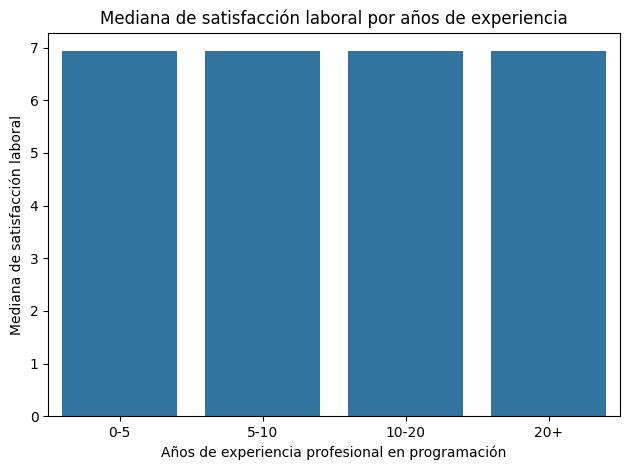

In [16]:
sns.barplot(data = median_sat, x = "ExperienceRange", y = "JobSat")
plt.title("Mediana de satisfacción laboral por años de experiencia")
plt.xlabel("Años de experiencia profesional en programación")
plt.ylabel("Mediana de satisfacción laboral")
plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_369/2485230505.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette='Set2')


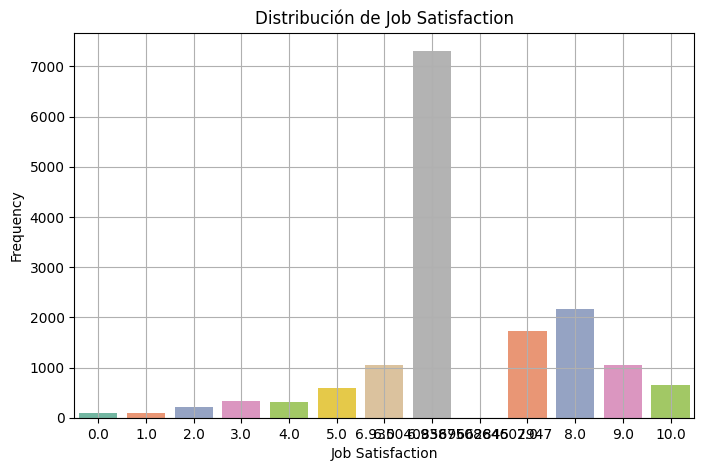

In [17]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='JobSat', palette='Set2')
plt.title("Distribución de Job Satisfaction")
plt.xlabel("Job Satisfaction")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_369/2682739791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='RemoteWork', palette='Set2')


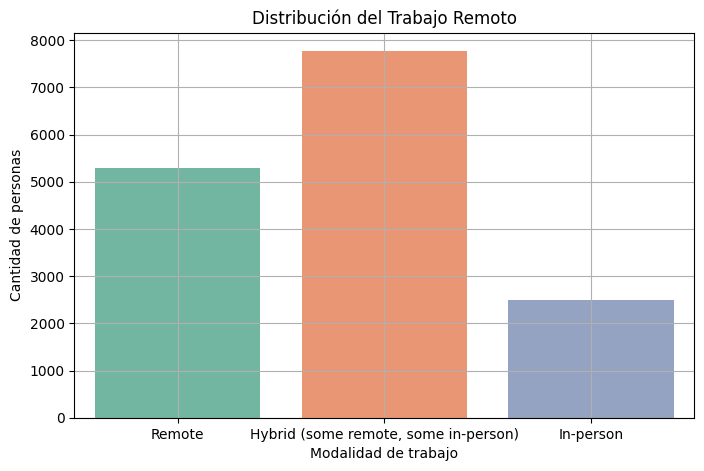

In [18]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='RemoteWork', palette='Set2')
plt.title('Distribución del Trabajo Remoto')
plt.xlabel('Modalidad de trabajo')
plt.ylabel('Cantidad de personas')
plt.grid(True)
plt.show()

In [19]:
remote_vs_employment = pd.crosstab(df['RemoteWork'], df['Employment'], normalize='columns') * 100
remote_vs_employment.round(2)

Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired",...,"Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time","Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Student, full-time;Not employed, but looking for work;Not employed, and not looking for work","Student, full-time;Not employed, but looking for work;Not employed, and not looking for work;Student, part-time","Student, full-time;Not employed, but looking for work;Retired","Student, full-time;Not employed, but looking for work;Student, part-time","Student, full-time;Student, part-time","Student, part-time","Student, part-time;Employed, part-time","Student, part-time;Retired"
RemoteWork,,,,,,,,,,,,,,,,,,,,,
"Hybrid (some remote, some in-person)",43.11,37.25,34.01,42.42,0.0,0.0,0.0,31.25,40.0,0.0,...,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,50.00,100.0
In-person,21.17,7.84,10.14,12.12,100.0,0.0,100.0,21.88,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.08,0.0
Remote,35.72,54.90,55.85,45.45,0.0,100.0,0.0,46.88,40.0,100.0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.92,0.0


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [20]:
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()

df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang = df_lang.explode('LanguageHaveWorkedWith')
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.strip()

lang_by_country = df_lang.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

sorted_df = lang_by_country.sort_values(by='Count', ascending=False)

top_countries = sorted_df['Country'].value_counts().head(10).index.tolist()

filtered = sorted_df[sorted_df['Country'].isin(top_countries)]
top_languages = filtered['LanguageHaveWorkedWith'].value_counts().head(5).index.tolist()

grouped = filtered[filtered['LanguageHaveWorkedWith'].isin(top_languages)]

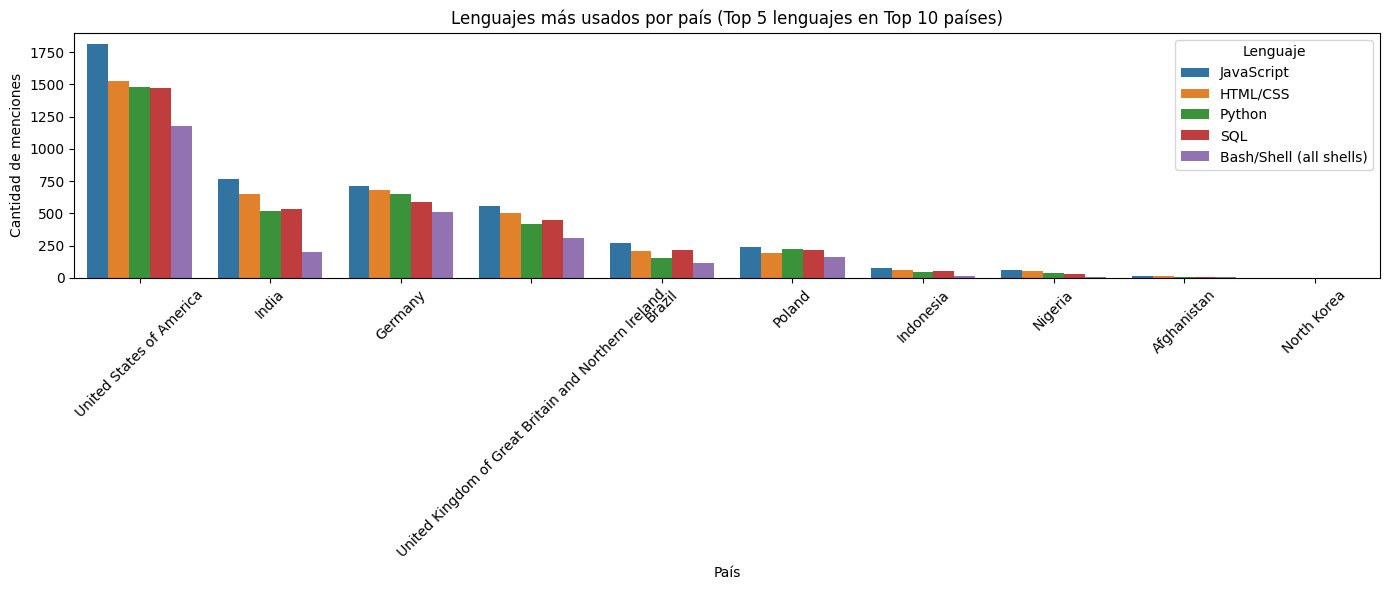

In [21]:
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='Country', y='Count', hue='LanguageHaveWorkedWith')
plt.title('Lenguajes más usados por país (Top 5 lenguajes en Top 10 países)')
plt.xlabel('País')
plt.ylabel('Cantidad de menciones')
plt.legend(title='Lenguaje')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


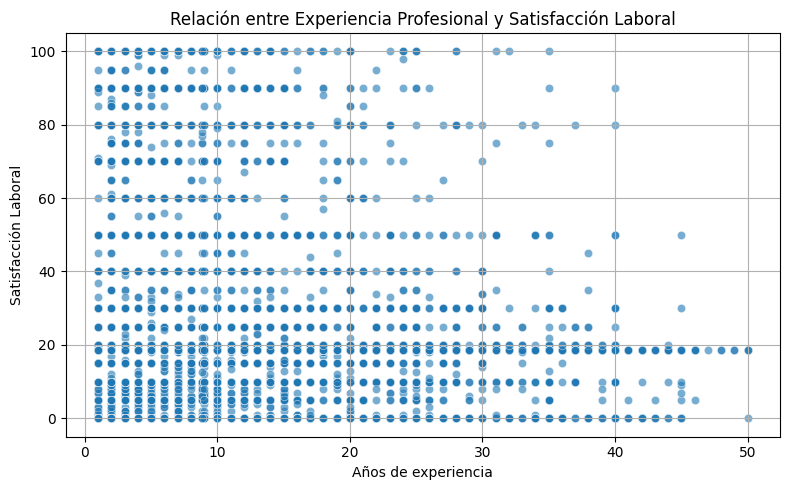

In [22]:
df["JobSatPoints_1"] = df["JobSatPoints_1"].fillna(df["JobSatPoints_1"].mean())
z_df = df[["YearsCodePro","JobSatPoints_1"]]

plt.figure(figsize=(8, 5))
sns.scatterplot(data=z_df, x='YearsCodePro', y='JobSatPoints_1', alpha=0.6)
plt.title('Relación entre Experiencia Profesional y Satisfacción Laboral')
plt.xlabel('Años de experiencia')
plt.ylabel('Satisfacción Laboral')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [23]:
tabla = pd.crosstab(df['EdLevel'], df['Employment'], normalize='index')
tabla

Employment,"Employed, full-time","Employed, full-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed","Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time","Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired",...,"Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time","Student, full-time;Not employed, but looking for work;Independent contractor, freelancer, or self-employed;Student, part-time;Employed, part-time;Retired","Student, full-time;Not employed, but looking for work;Not employed, and not looking for work","Student, full-time;Not employed, but looking for work;Not employed, and not looking for work;Student, part-time","Student, full-time;Not employed, but looking for work;Retired","Student, full-time;Not employed, but looking for work;Student, part-time","Student, full-time;Student, part-time","Student, part-time","Student, part-time;Employed, part-time","Student, part-time;Retired"
EdLevel,,,,,,,,,,,,,,,,,,,,,
"Associate degree (A.A., A.S., etc.)",0.626087,0.004348,0.058696,0.008696,0.000000,0.000000,0.000000,0.004348,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004348,0.008696,0.000000
"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",0.679381,0.003595,0.056589,0.002501,0.000000,0.000000,0.000000,0.002345,0.000469,0.000000,...,0.000156,0.000000,0.000000,0.000156,0.000000,0.000156,0.000625,0.002657,0.007660,0.000000
"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",0.699975,0.003480,0.063137,0.001491,0.000249,0.000000,0.000000,0.001243,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000249,0.000000,0.000249,0.001989,0.004226,0.000000
Primary/elementary school,0.140468,0.003344,0.020067,0.000000,0.003344,0.000000,0.003344,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010033,0.030100,0.000000,0.000000
"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",0.683646,0.001340,0.052279,0.002681,0.000000,0.000000,0.000000,0.001340,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002681,0.000000
"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",0.289529,0.003514,0.024596,0.001405,0.000000,0.000703,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001405,0.018974,0.019677,0.000000
Some college/university study without earning a degree,0.475689,0.002005,0.052130,0.001504,0.000000,0.000000,0.000000,0.004010,0.001003,0.000501,...,0.000000,0.000501,0.001003,0.000000,0.000000,0.000501,0.000000,0.011529,0.014035,0.000000
Something else,0.376106,0.004425,0.048673,0.000000,0.000000,0.000000,0.000000,0.004425,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008850,0.017699,0.008850,0.004425


/tmp/ipykernel_302/1711515564.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


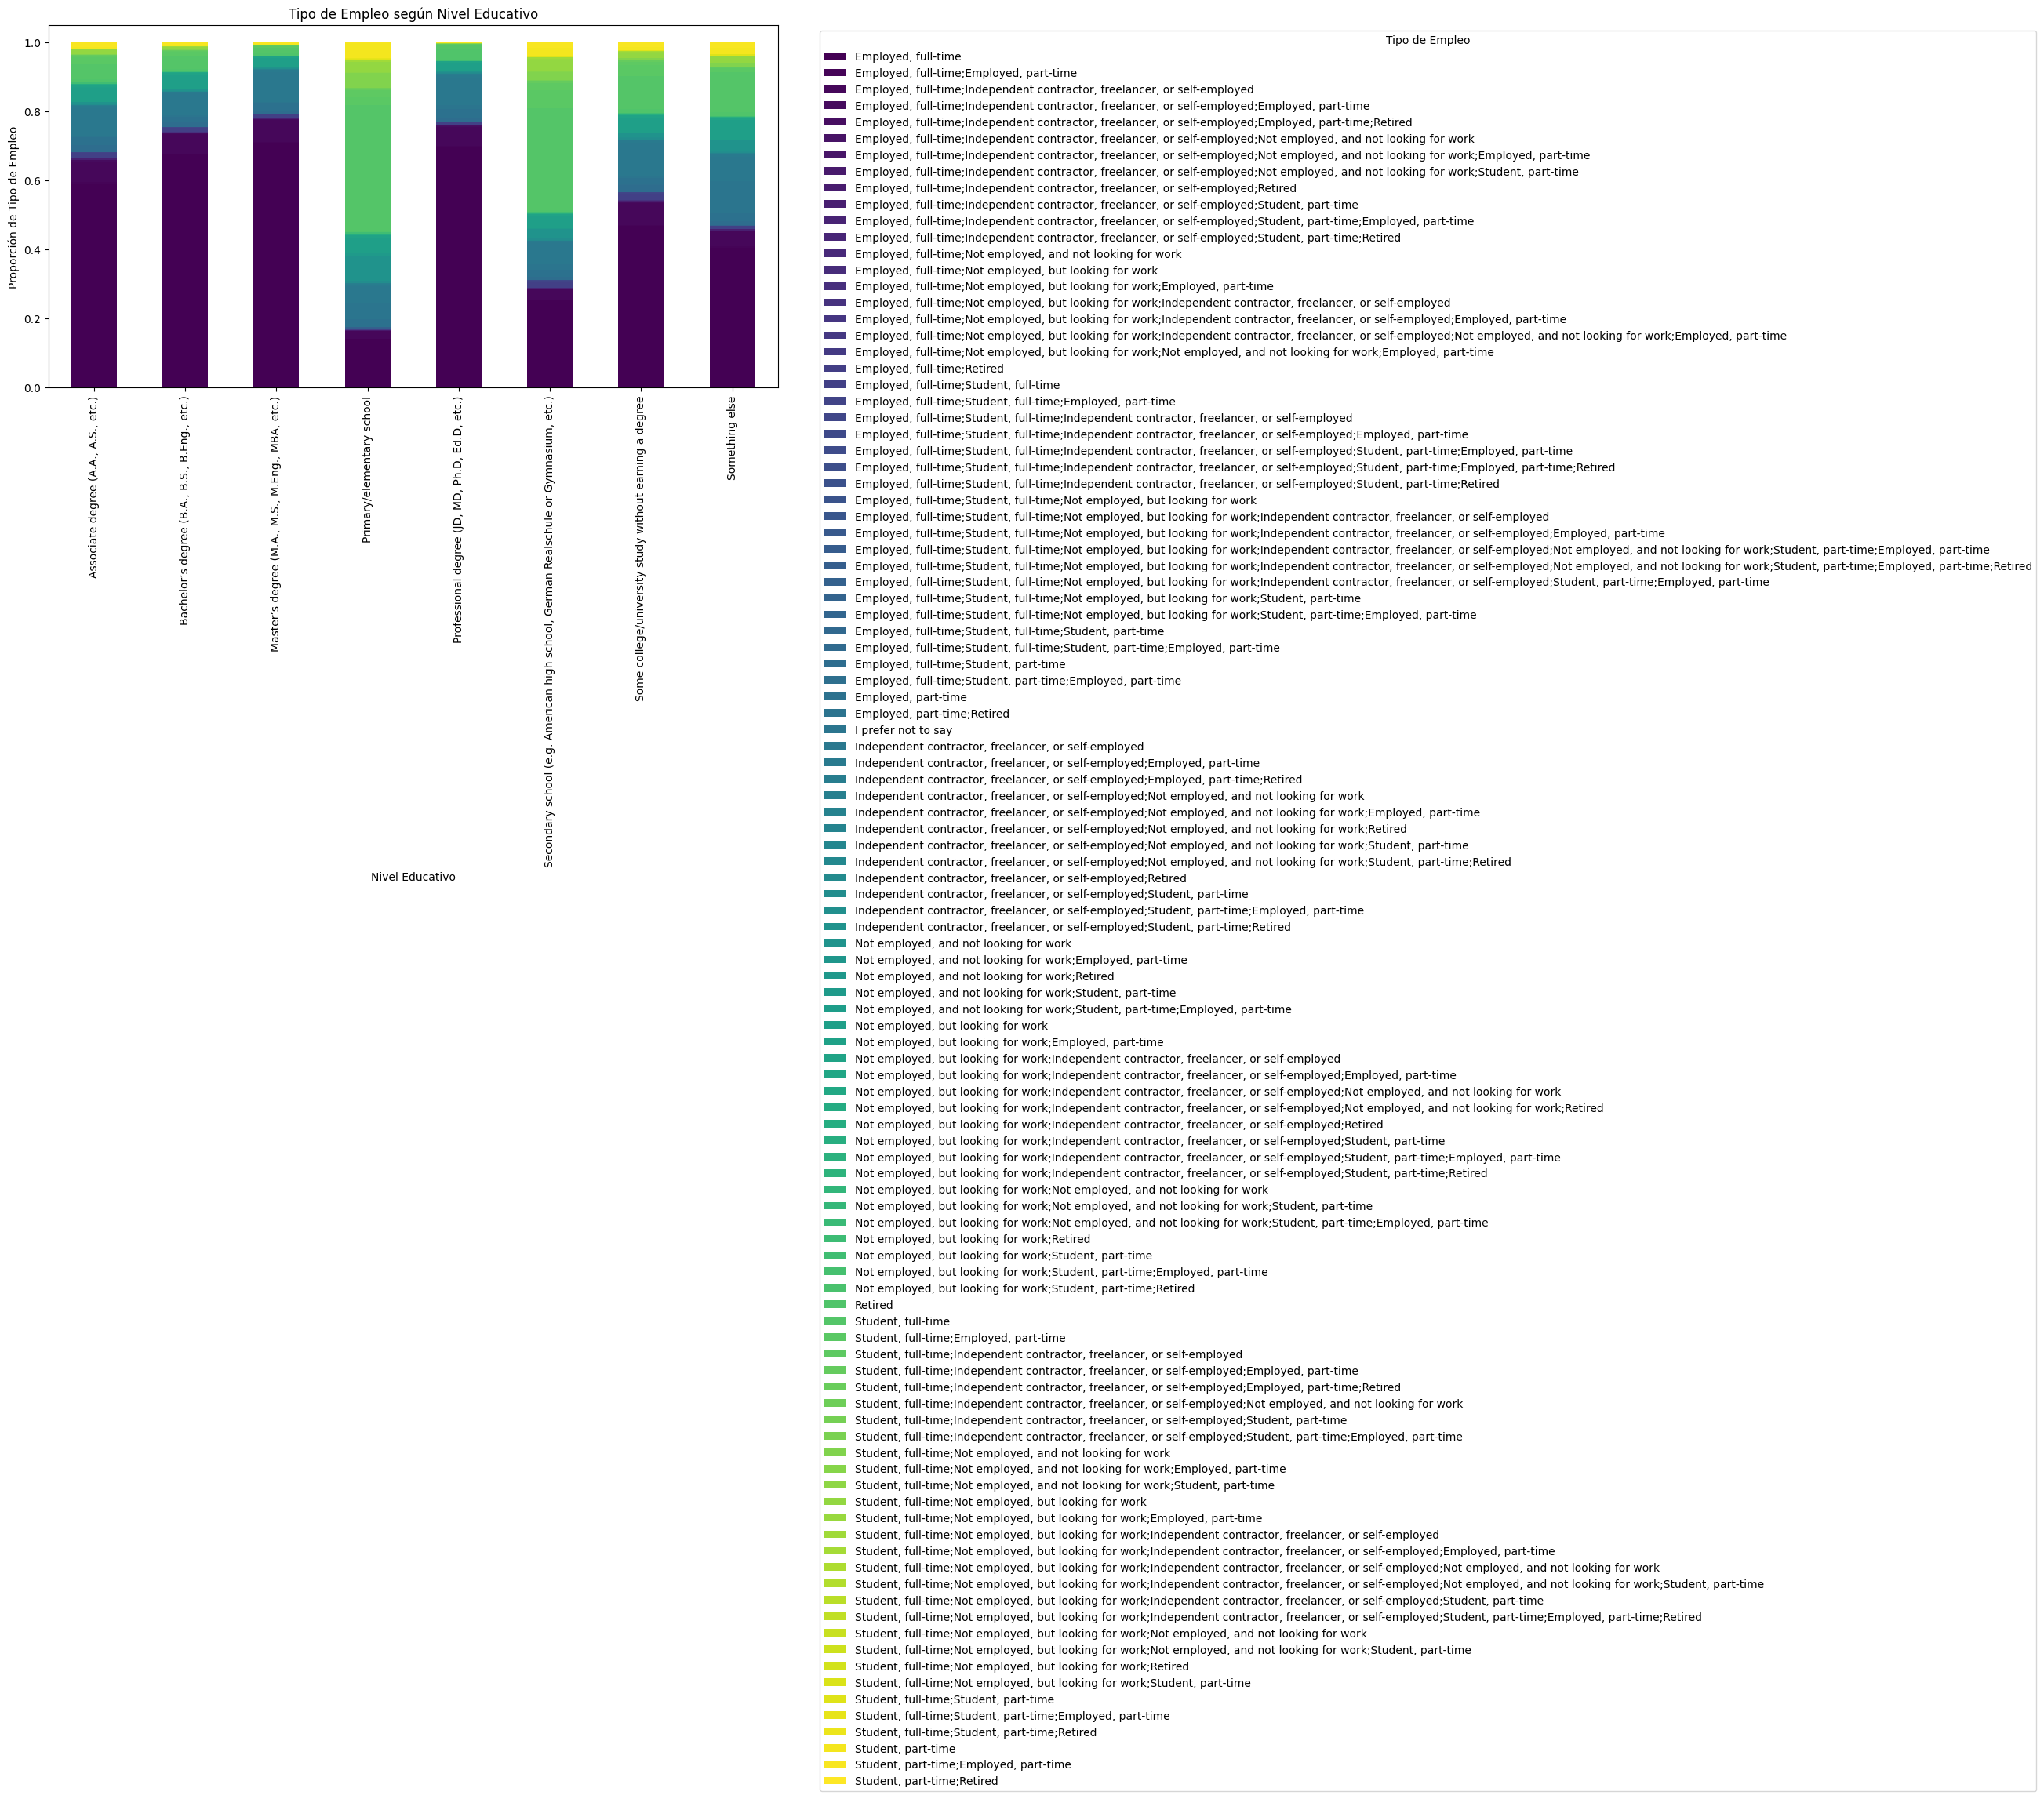

In [24]:
tabla.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')

plt.title('Tipo de Empleo según Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Proporción de Tipo de Empleo')
plt.legend(title='Tipo de Empleo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
df.to_csv("dataset_modificado.csv", index=False)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
